<img src="img/Recurso-26.png" width="200">

## Regresion lineal ejercicio

![logo](img/python_logo.png)


**Ismael Anrrango**  
[Link al repositorio](https://github.com/Ismakolis/EjerciciosMachinelearning-.git)

<a href="https://colab.research.google.com/drive/1tnOvFNgXiLtktiSsltTr0s308LZSsEPJ">Abre este Jupyter en Google Colab</a>

# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 0. Imports

In [24]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn


### 1. Generación del conjunto de datos

In [25]:
# Se importan librerias de numpy y pandas c/u con su alias
import numpy as np
import pandas as pd
# Se asignan 100 valores randomicos para x entre 0 y 2
X = 2 * np.random.rand(100, 1)
# Se asignan valores a y utilizando una relacion lienal"y= 4 + 3 * x y el ruido"
y = 4 + 3 * X + np.random.randn(100, 1)
# Se muestra la longitud del conjunto de datos
print("La longitud del conjunto de datos es:", len(X))
# Se cambia X e y en un solo array, entonces esto crea un solo array de 100 filas y dos columas
# Sino hacia esto me daba un error en la grafica
data = np.hstack((X, y))
# Se combierte el array en un dataframe
data = pd.DataFrame(data,columns= ["X","y"])
print(data)
# Solo se muestra los datos estaditicos del dataframe con .describe()
data.describe()


La longitud del conjunto de datos es: 100
           X         y
0   1.057552  9.241515
1   0.583936  5.295421
2   1.922092  9.500924
3   1.412400  6.759550
4   0.239713  4.913257
..       ...       ...
95  1.496627  6.858853
96  1.972652  7.776362
97  0.827114  7.455449
98  1.786262  8.732594
99  0.003886  2.663279

[100 rows x 2 columns]


,X,y
count,100.000000,100.000000
mean,1.108407,7.198132
std,0.601715,2.076300
min,0.003886,2.348366
25%,0.655716,5.534785
50%,1.097742,7.574533
75%,1.642511,8.789969
max,1.999390,11.589395


### 2. Visualización del conjunto de datos

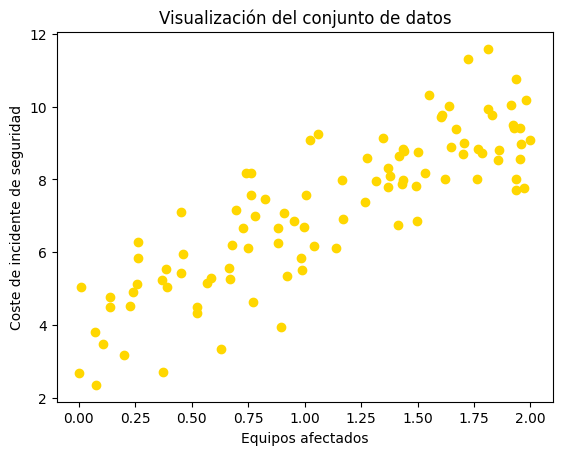

In [26]:
# tu respuesta aqui
# Se importa la libreria matplotlip para generar graficos con su alias
import matplotlib.pyplot as plt
# Se crea un grafico con dispersion de datos eso hace scatter se representra X,y y la dispersion de los datos de color gold
plt.scatter(X, y, color='gold')
# En estas lienas se escribe en la grafica por ejemplo, se pone un titulo general y un titulo a X e y
plt.title("Visualización del conjunto de datos")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste de incidente de seguridad")
# Se imprime el grafico geenrado
plt.show()

### 3. Modificación del conjunto de datos

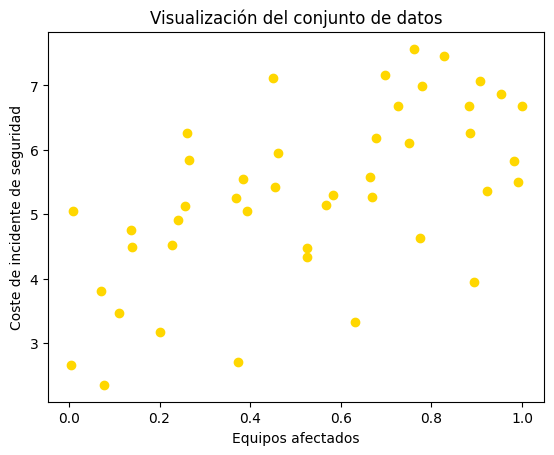

In [28]:
# Tu respuesta aqui
# No hace falta reducir el conjunto por que los mdaatos no estan tan dispersos pero si el ejercicio lo necesita qui esta el codigo de ejemplo
# En la variable datos_fltrados se guarda digamos asi un segemento de datos tanto para X e y del dataframe se seleccionan las filas donde 
# x va a ser menor o igual que 1 e y menor o igual  a 8
# datos_filtrados = data[(data['X'] <= 1) & (data['y'] <= 8)]
# # en la variable f1 se guardan los valores de x del dataframe filtrado lo mismo para y
# f1 = datos_filtrados['X'].values
# f2 = datos_filtrados['y'].values
# # En estas lienas solo se añaden titulos
# plt.title("Visualización del conjunto de datos")
# plt.xlabel("Equipos afectados")
# plt.ylabel("Coste de incidente de seguridad")
# # se crftea el grafico con la dispersion de datos solo con los datos filtradios
# plt.scatter(f1, f2 , color = 'gold')
# # Se muestra el grafico
# plt.show()


### 4. Construcción del modelo

In [29]:
#Tu respuesta aqui 
# Se +selecciona los valores de la columna X del data, el doble corchete hace que se creee un dataframe y no una serie
dataX =data[["X"]]
# se convierte el dataframe de dataX en un array de numpu y se guarda en X_train
X_train = np.array(dataX)
# Se accede a los valores y, como tiene un solo corchete es una serie y con .values se convierte en un array de numpy unidimencional
# y se guarda en y_train
y_train = data['y'].values
# Se muestran los resultados de los valores
print(X_train, y_train)

[[1.05755203]
 [0.58393624]
 [1.92209177]
 [1.41240025]
 [0.23971305]
 [0.13943154]
 [0.20054929]
 [0.8820704 ]
 [1.67130974]
 [0.00863479]
 [0.95421363]
 [0.66411081]
 [0.90776181]
 [0.56710452]
 [0.25720249]
 [0.73880499]
 [1.41671386]
 [0.99022042]
 [0.07171225]
 [1.31603743]
 [1.76890931]
 [0.72642817]
 [1.91490325]
 [0.2608931 ]
 [1.98217006]
 [1.36785414]
 [1.70533247]
 [0.76325544]
 [1.64856651]
 [0.46045737]
 [0.63052961]
 [1.60328285]
 [1.34608511]
 [0.13727938]
 [0.36821631]
 [1.02211052]
 [0.89420074]
 [1.53418117]
 [1.83085931]
 [1.50075822]
 [1.43284914]
 [0.99918351]
 [0.76154111]
 [1.86179311]
 [0.74965106]
 [1.36947912]
 [1.04304818]
 [1.72559375]
 [0.22640318]
 [0.69698122]
 [1.27665072]
 [0.67888162]
 [0.10992142]
 [1.3778312 ]
 [1.99939047]
 [1.93566034]
 [0.98271618]
 [0.88424041]
 [0.77969765]
 [1.49400946]
 [0.52509001]
 [1.9262792 ]
 [1.00804965]
 [0.45110677]
 [1.95250067]
 [1.81234765]
 [0.45510057]
 [1.64049228]
 [1.43991717]
 [1.26959987]
 [0.38479479]
 [1.54

In [30]:
# se importa el modulo de modelos lineales
from sklearn import linear_model
# Se importan dos metricas para evaluar el rendimiento del modelo que se creo anteriormente
# mean_squared_error funciona para medir el error cuadrático medio,r2_score mide que tan bien el modelo explica la variabilidad de los datos.
from sklearn.metrics import mean_squared_error, r2_score
#regr = linear_model.LinearRegression() como tal lo que hace es digamos marcar la linea en el plano cartesiano en termino mas simples,
# pero como tal esta instancia funciona para realizar despues las predicciones en base a la dispersion de los datos
regr = linear_model.LinearRegression()
# Con esta linea lo que se hace es entrenar el modelo por decirlo asi, apredne en referencia de la variable independiente que es X y la dependiente y
regr.fit(X_train,y_train)
# Se utiliza el modelo entrenado para hacer predicciones en base de los mismos datos de X_train. y_pred guarda las predicciones.
y_pred = regr.predict(X_train)

# Se muestra el coeficinete o pendiente de la recta
print('Coeficiente (pendiente): \n', regr.coef_)

# Imprime el término independiente (intercepto), es decir, el valor de y cuando X = 0
# Se imprime el termino independiente, ose ael valor de y cuando x es  0
print('Término independiente: \n', regr.intercept_)
# Se imprime el error cuadratico medio.
print("Error cuadrático medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Puntaje de varianza (R²): %.2f' % r2_score(y_train, y_pred))

Coeficiente (pendiente): 
 [2.94101615]
Término independiente: 
 3.938290393342349
Error cuadrático medio: 1.17
Puntaje de varianza (R²): 0.73


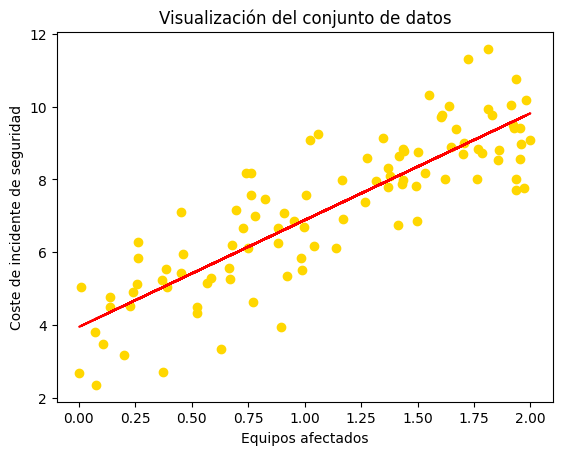

In [31]:
# Grafico
# Se genera un grafico con los datos de de X_train [:,0] le digo que tome los todos los valores de la primera columna estos,
# son los valores de entrada y y_train contiene los valores de salida y se pinta de color gold los valores
plt.scatter(X_train[:,0],y_train, color = 'gold')
# Con esat liena lo se grafica la liena de regresion dentro del modelo utilizando loos mismos valores de X_train y los valores de prediccion de y_pred
plt.plot(X_train[:,0],y_pred, color='red')
# Solo se añaden titulos
plt.title("Visualización del conjunto de datos")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste de incidente de seguridad")
plt.show()

### 5. Predicción de nuevos ejemplos

Ingresa un valor a predecir 1


C:\Users\Ismael\AppData\Local\Temp\ipykernel_7068\3058937759.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(valor))
C:\Users\Ismael\AppData\Local\Temp\ipykernel_7068\3058937759.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(valor))


6
6.879306540239791


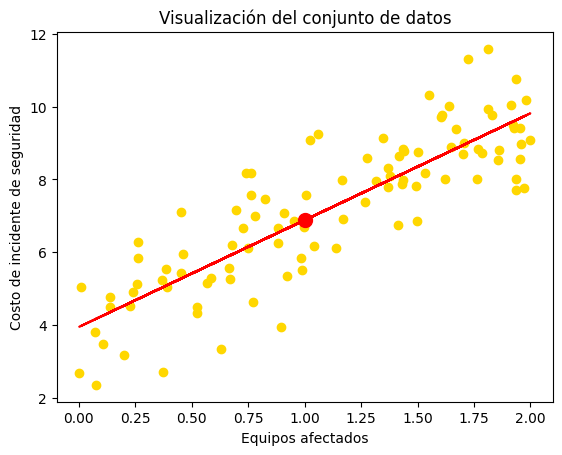

In [34]:
#Tu respuesta aqui
# Se guarda en la variable variable_prediccion un valor ingresado por teclado que sea entero
variable_prediccion = int(input("Ingresa un valor a predecir"))
# Se utiliza el modelo entrenado regr para la prediccion mediante la variable_preddiccion que se ingreso por teclado y se guarda en valor
valor = regr.predict([[variable_prediccion]])
# se imprime el valor predicho
print(int(valor))
print(float(valor))
# Se maneja la misma logica para el grafico
plt.title("Visualización del conjunto de datos")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo de incidente de seguridad")
plt.scatter(X_train[:,0],y_train, color = 'gold')
plt.plot(X_train[:,0],y_pred, color='red')
# Solo se añade una liena para graficar el punto exacto de prediccion con la variable_prediccion ingresada y la prediccion que es valor
plt.scatter(variable_prediccion, valor, color='red',s= 100)
# Se imoprime el graficop
plt.show()